This is to validate and dissect the updated `tojeiro.4comp` implementation in `models.FSPS`

In [1]:
import os
import numpy as np 
# --- provabgs --- 
from provabgs import models as Models

In [2]:
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
fsps = Models.FSPS(name='nmf_bases')

In [4]:
tlookback = np.linspace(0, 13., 50)
tages = 0.5 * (tlookback[1:] + tlookback[:-1])

(0.0, 13.0)

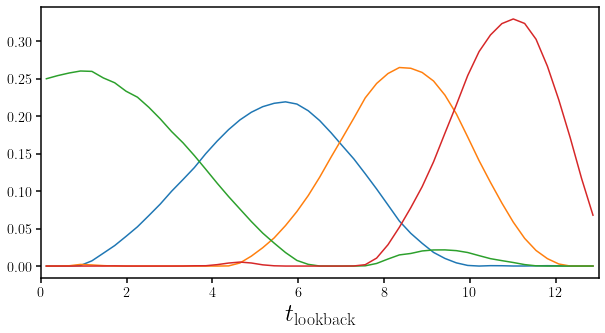

In [5]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i in range(4): 
    tt_sfh = np.zeros(4)
    tt_sfh[i] = 1.
    sfh = np.sum(np.array([tt_sfh[i] * fsps._sfh_basis[i](tages)/np.trapz(fsps._sfh_basis[i](tages), tages) for i in range(fsps._Ncomp_sfh)]), axis=0)
    sub.plot(tages, sfh)
sub.set_xlabel(r"$t_{\rm lookback}$", fontsize=25)
sub.set_xlim(0., 13.)

(0.0, 13.0)

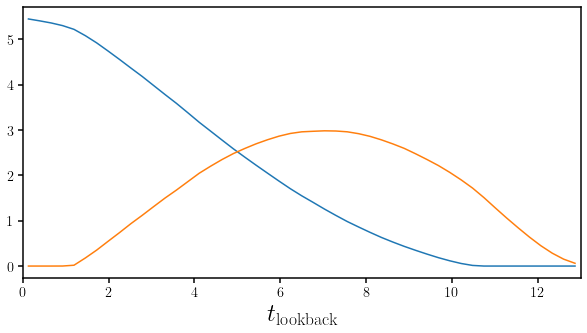

In [6]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i in range(2): 
    tt_zh = np.zeros(2)
    tt_zh[i] = 1.
    zh = np.sum(np.array([tt_zh[i] * fsps._zh_basis[i](tages) for i in range(fsps._Ncomp_zh)]), axis=0)
    sub.plot(tages, zh)
sub.set_xlabel(r"$t_{\rm lookback}$", fontsize=25)
sub.set_xlim(0., 13.)

In [7]:
fsps._ssp_initiate()

mtot= 1.0331905243302124


(3000.0, 10000.0)

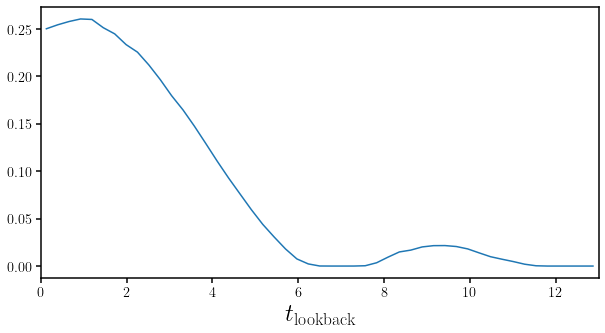

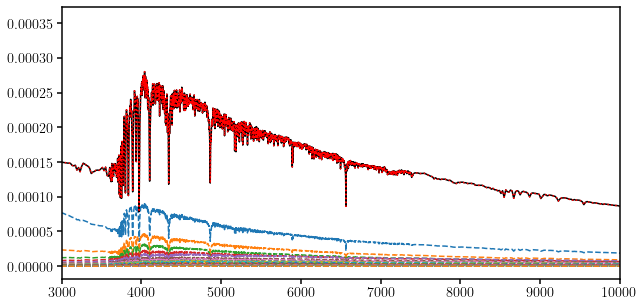

In [8]:
tlookback = np.linspace(0, 13., 50)
tages = 0.5 * (tlookback[1:] + tlookback[:-1])
dt = np.diff(tlookback)

tt_sfh = np.array([0., 0., 1., 0.])
tt_zh = np.array([1e-3, 1e-3])

sfh = np.sum(np.array([tt_sfh[i] * fsps._sfh_basis[i](tages)/np.trapz(fsps._sfh_basis[i](tages), tages) for i in range(fsps._Ncomp_sfh)]), axis=0)
zh = np.sum(np.array([tt_zh[i] * fsps._zh_basis[i](tages) for i in range(fsps._Ncomp_zh)]), axis=0)

fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.plot(tages, sfh)
sub.set_xlabel(r"$t_{\rm lookback}$", fontsize=25)
sub.set_xlim(0., 13.)


fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
m_tot = 0
for i, tage, m, z in zip(range(len(tages)), tages, sfh, zh): 
    if m <= 0:
        continue
    fsps._ssp.params['logzsol'] = np.log10(z/0.0190) # log(Z/Zsun)
    fsps._ssp.params['dust1'] = 0
    fsps._ssp.params['dust2'] = 0 
    fsps._ssp.params['dust_index'] = 0

    wave_rest, lum_i = fsps._ssp.get_spectrum(tage=tage, peraa=True) # in units of Lsun/AA
    # note that this spectrum is normalized such that the total formed
    # mass = 1 Msun
    sub.plot(wave_rest, m * lum_i/np.sum(sfh), ls='--')
    m_tot += dt[i] * m
    if i == 0: lum_ssp = np.zeros(len(wave_rest))
    lum_ssp += m * lum_i 
print('mtot=', m_tot)
# the following normalization is to deal with the fact that
# fsps.get_spectrum is normalized so that formed_mass = 1 Msun
lum_ssp /= np.sum(sfh) 

sub.plot(wave_rest, lum_ssp, c='k')

w, lum = fsps._fsps_nmf(np.array([0, 0, 1, 0, 1e-3, 1e-3, 0, 0, 0, 13.]))
sub.plot(w, lum, c='r', ls=':')
sub.set_xlim(3e3, 1e4)

mtot= 1.009011637002163


(3000.0, 10000.0)

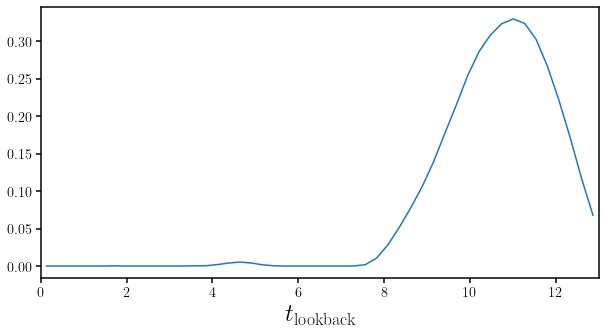

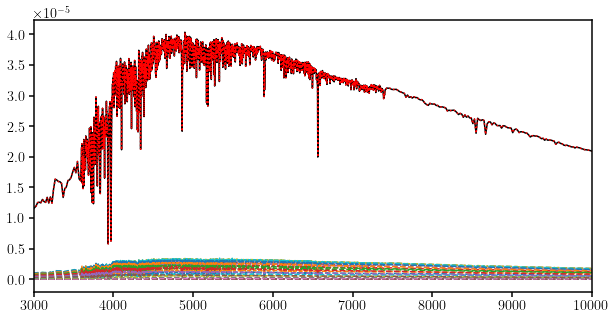

In [9]:
tt_sfh = np.array([0., 0., 0., 1.])
tt_zh = np.array([1e-3, 1e-3])

sfh = np.sum(np.array([tt_sfh[i] * fsps._sfh_basis[i](tages)/np.trapz(fsps._sfh_basis[i](tages), tages) for i in range(fsps._Ncomp_sfh)]), axis=0)
zh = np.sum(np.array([tt_zh[i] * fsps._zh_basis[i](tages) for i in range(fsps._Ncomp_zh)]), axis=0)

fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.plot(tages, sfh)
sub.set_xlabel(r"$t_{\rm lookback}$", fontsize=25)
sub.set_xlim(0., 13.)


fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
m_tot = 0
for i, tage, m, z in zip(range(len(tages)), tages, sfh, zh): 
    if m <= 0 and i != 0 :
        continue
    fsps._ssp.params['logzsol'] = np.log10(z/0.0190) # log(Z/Zsun)
    fsps._ssp.params['dust1'] = 0
    fsps._ssp.params['dust2'] = 0 
    fsps._ssp.params['dust_index'] = 0

    wave_rest, lum_i = fsps._ssp.get_spectrum(tage=tage, peraa=True) # in units of Lsun/AA
    # note that this spectrum is normalized such that the total formed
    # mass = 1 Msun
    sub.plot(wave_rest, m * lum_i/np.sum(sfh), ls='--')
    m_tot += dt[i] * m
    if i == 0: lum_ssp = np.zeros(len(wave_rest))
    lum_ssp += m * lum_i 
print('mtot=', m_tot)
# the following normalization is to deal with the fact that
# fsps.get_spectrum is normalized so that formed_mass = 1 Msun
lum_ssp /= np.sum(sfh) 

sub.plot(wave_rest, lum_ssp, c='k')

w, lum = fsps._fsps_nmf(np.array([0, 0, 0, 1, 1e-3, 1e-3, 0, 0, 0, 13.]))
sub.plot(w, lum, c='r', ls=':')
sub.set_xlim(3e3, 1e4)